# 1.1 Datasets

Before we can analyze data, we need to understand what data *is* and how we represent it.

## What is a Dataset?

A **dataset** is a collection of descriptions of different instances of the same phenomenon. These descriptions could take a variety of forms, but it is important that they are descriptions of the **same thing**.

### Examples of Datasets

1. **Rainfall measurements**: Daily rainfall in a garden over many years
2. **Height measurements**: Height of each person in a room
3. **Family sizes**: Number of children in each family on a block
4. **Preferences**: Whether 10 classmates prefer to be rich or famous
5. **Student records**: Test scores, attendance, demographics for students in a class

### Key Characteristic

All items in a dataset must be:
- Descriptions of the **same type of entity**
- Measured or recorded in a **consistent way**
- Comparable to each other

❌ **Not a dataset**: [height of person 1, weight of person 2, age of person 3]  
✅ **Valid dataset**: [height of person 1, height of person 2, height of person 3]

## Data Items and D-Tuples

A dataset consists of **$N$ data items**, where each data item is a **d-tuple** - an ordered list of $d$ elements.

### Notation Conventions

- **$N$**: Number of items in the dataset (always)
- **$d$**: Number of elements in each tuple (always the same for all tuples)
- **$\{x\}$**: The entire dataset
- **$x_i$**: The $i$-th data item
- **$x_i^{(j)}$**: The $j$-th component of the $i$-th data item

### Example: Students Dataset

Consider 5 students with (height in cm, weight in kg, age in years):

| Student | Height | Weight | Age |
|---------|--------|--------|-----|
| $x_1$ | 165 | 55 | 20 |
| $x_2$ | 170 | 62 | 21 |
| $x_3$ | 168 | 58 | 20 |
| $x_4$ | 175 | 70 | 22 |
| $x_5$ | 172 | 65 | 21 |

Here:
- $N = 5$ (five students)
- $d = 3$ (three measurements per student)
- $x_1 = (165, 55, 20)$ (first student's data)
- $x_3^{(2)} = 58$ (third student's weight)

## Types of Data

Data comes in different types, each requiring different analysis techniques.

### 1. Categorical Data

**Categorical data** consists of values from a fixed set of categories with no inherent numerical meaning.

**Examples**:
- Gender: {Male, Female, Other}
- Color: {Red, Blue, Green, Yellow}
- Country: {USA, Canada, Mexico, ...}
- Yes/No responses

**Characteristics**:
- Cannot meaningfully compute mean or standard deviation
- Can count frequencies
- Can compute mode (most common category)
- Use bar charts for visualization

Frequencies: Counter({'Red': 5, 'Blue': 4, 'Green': 2, 'Yellow': 1})
Mode: Red


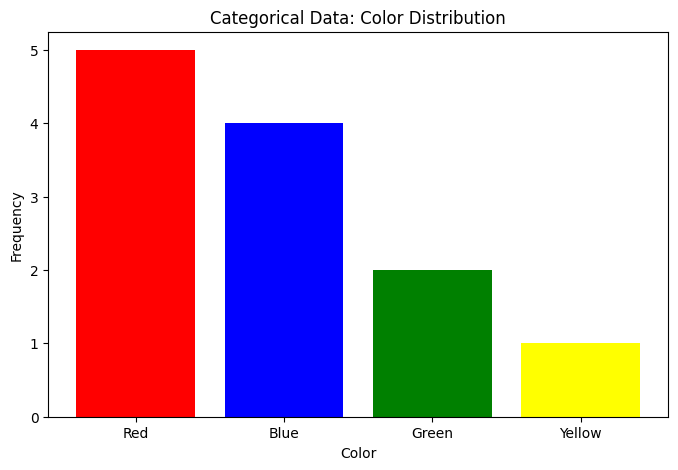

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Categorical data example
colors = ['Red', 'Blue', 'Red', 'Green', 'Blue', 'Red', 
          'Yellow', 'Blue', 'Red', 'Blue', 'Green', 'Red']

# Count frequencies
counts = Counter(colors)
print("Frequencies:", counts)
print("Mode:", counts.most_common(1)[0][0])

# Visualize
categories = list(counts.keys())
frequencies = list(counts.values())

plt.figure(figsize=(8, 5))
plt.bar(categories, frequencies, color=['red', 'blue', 'green', 'yellow'])
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Categorical Data: Color Distribution')
plt.show()

Median rating: Good
Mode rating: Good


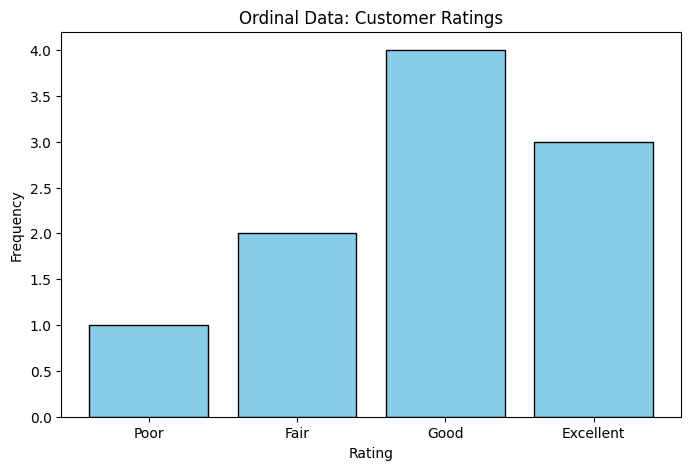

In [2]:
# Ordinal data example
ratings = ['Good', 'Excellent', 'Fair', 'Good', 'Poor', 
           'Excellent', 'Good', 'Good', 'Fair', 'Excellent']

# Define order
order = ['Poor', 'Fair', 'Good', 'Excellent']

# Map to numbers for analysis
rating_map = {rating: i for i, rating in enumerate(order)}
numeric_ratings = [rating_map[r] for r in ratings]

print(f"Median rating: {order[int(np.median(numeric_ratings))]}")
print(f"Mode rating: {Counter(ratings).most_common(1)[0][0]}")

# Visualize
rating_counts = Counter(ratings)
ordered_counts = [rating_counts[r] for r in order]

plt.figure(figsize=(8, 5))
plt.bar(order, ordered_counts, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ordinal Data: Customer Ratings')
plt.show()

Mean height: 171.07 cm
Median height: 170.70 cm
Std deviation: 3.47 cm


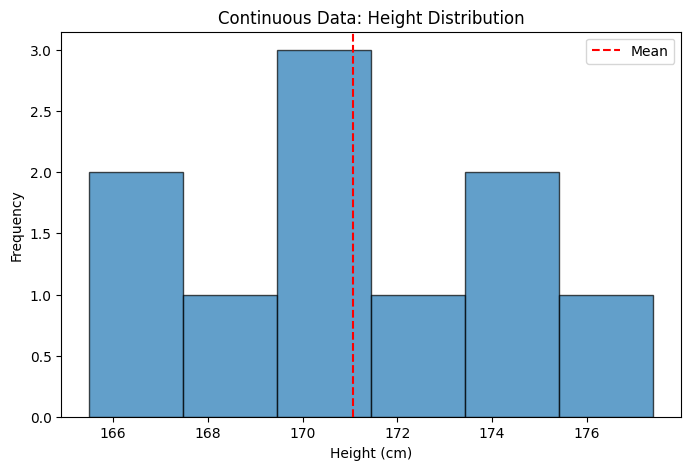

In [3]:
# Continuous data example
heights = np.array([165.5, 170.2, 168.7, 175.1, 172.3, 
                    169.8, 173.6, 177.4, 171.2, 166.9])

print(f"Mean height: {np.mean(heights):.2f} cm")
print(f"Median height: {np.median(heights):.2f} cm")
print(f"Std deviation: {np.std(heights):.2f} cm")

plt.figure(figsize=(8, 5))
plt.hist(heights, bins=6, edgecolor='black', alpha=0.7)
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Continuous Data: Height Distribution')
plt.axvline(np.mean(heights), color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()

Mean: 1.55 children
Median: 2 children
Mode: 1 children


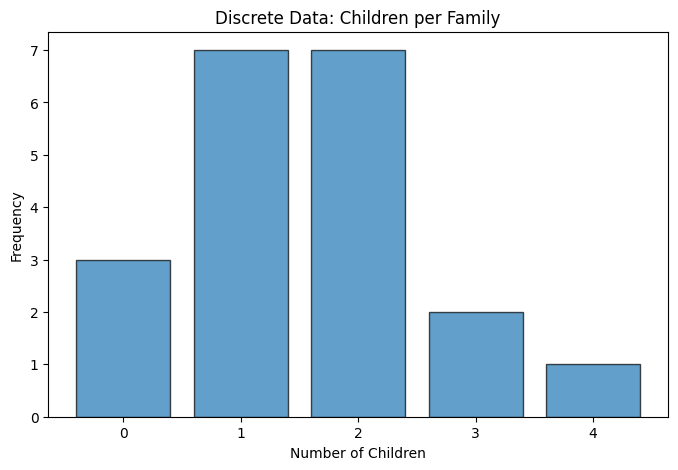

In [4]:
# Discrete data example
children_per_family = np.array([0, 1, 2, 1, 3, 2, 1, 0, 2, 1, 
                                 2, 4, 1, 2, 3, 1, 2, 0, 1, 2])

print(f"Mean: {np.mean(children_per_family):.2f} children")
print(f"Median: {np.median(children_per_family):.0f} children")
print(f"Mode: {Counter(children_per_family).most_common(1)[0][0]} children")

plt.figure(figsize=(8, 5))
values, counts = np.unique(children_per_family, return_counts=True)
plt.bar(values, counts, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Discrete Data: Children per Family')
plt.xticks(values)
plt.show()

In [5]:
import pandas as pd

# Dataset with missing values
data = pd.DataFrame({
    'Height': [165, 170, 168, np.nan, 172],
    'Weight': [55, 62, np.nan, 70, 65],
    'Score': [85, 90, 88, 92, np.nan]
})

print("Original data:")
print(data)
print(f"\nMissing values:\n{data.isna().sum()}")

# Strategy 1: Drop rows with any missing
data_dropped = data.dropna()
print(f"\nAfter dropping: {len(data_dropped)} rows")

# Strategy 2: Fill with mean
data_filled = data.fillna(data.mean())
print("\nAfter filling with mean:")
print(data_filled)

Original data:
   Height  Weight  Score
0   165.0    55.0   85.0
1   170.0    62.0   90.0
2   168.0     NaN   88.0
3     NaN    70.0   92.0
4   172.0    65.0    NaN

Missing values:
Height    1
Weight    1
Score     1
dtype: int64

After dropping: 2 rows

After filling with mean:
   Height  Weight  Score
0  165.00    55.0  85.00
1  170.00    62.0  90.00
2  168.00    63.0  88.00
3  168.75    70.0  92.00
4  172.00    65.0  88.75


## Loading and Exploring Datasets

### Reading CSV Files

In [7]:
import pandas as pd
import io

# Read CSV
# Create sample CSV file with random data
csv_data = """Name,Age,Score
Alice,20,85
Bob,21,90
Charlie,20,88
David,22,92
Eve,21,87"""

with open('data.csv', 'w') as f:
    f.write(csv_data)

df = pd.read_csv('data.csv')

# Basic exploration
print(df.head())  # First 5 rows
print(df.info())  # Data types and missing values
print(df.describe())  # Summary statistics

      Name  Age  Score
0    Alice   20     85
1      Bob   21     90
2  Charlie   20     88
3    David   22     92
4      Eve   21     87
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Score   5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes
None
            Age      Score
count   5.00000   5.000000
mean   20.80000  88.400000
std     0.83666   2.701851
min    20.00000  85.000000
25%    20.00000  87.000000
50%    21.00000  88.000000
75%    21.00000  90.000000
max    22.00000  92.000000


In [8]:
import pandas as pd
import numpy as np

# From dictionary
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [20, 21, 20, 22],
    'Score': [85, 90, 88, 92]
}
df = pd.DataFrame(data)

print(df)
print(f"\nDataset has {len(df)} items (N = {len(df)})")
print(f"Each item has {len(df.columns)} features (d = {len(df.columns)})")

      Name  Age  Score
0    Alice   20     85
1      Bob   21     90
2  Charlie   20     88
3    David   22     92

Dataset has 4 items (N = 4)
Each item has 3 features (d = 3)


## Common Data Sources

### 1. Surveys and Questionnaires
- Collect specific information from individuals
- Often mix categorical and continuous data
- Example: Customer satisfaction surveys

### 2. Sensors and Measurements
- Automated data collection
- Usually continuous or discrete
- Example: Temperature sensors, GPS coordinates

### 3. Databases and Records
- Existing organizational data
- Structured format
- Example: Hospital records, sales transactions

### 4. Web Scraping
- Extract data from websites
- Requires cleaning and processing
- Example: Product prices, social media data

### 5. Public Datasets
- Freely available for research and education
- Often well-documented
- Examples:
  - [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml)
  - [Kaggle Datasets](https://www.kaggle.com/datasets)
  - [Data.gov](https://www.data.gov)

## Best Practices for Working with Datasets

### 1. Always Explore First

In [9]:
# Check first few rows
print(df.head())

# Check data types
print(df.dtypes)

# Check for missing values
print(df.isna().sum())

# Summary statistics
print(df.describe())

      Name  Age  Score
0    Alice   20     85
1      Bob   21     90
2  Charlie   20     88
3    David   22     92
Name     object
Age       int64
Score     int64
dtype: object
Name     0
Age      0
Score    0
dtype: int64
             Age      Score
count   4.000000   4.000000
mean   20.750000  88.750000
std     0.957427   2.986079
min    20.000000  85.000000
25%    20.000000  87.250000
50%    20.500000  89.000000
75%    21.250000  90.500000
max    22.000000  92.000000


### 2. Visualize Early

- Plot histograms for continuous variables
- Create bar charts for categorical variables
- Look for outliers and patterns

### 3. Document Your Data

- What does each column represent?
- What are the units?
- When/how was data collected?
- Are there known issues?

### 4. Clean Your Data

- Handle missing values
- Remove duplicates
- Fix data type issues
- Deal with outliers

In [11]:
# Example cleaning pipeline
df_clean = df.copy()

# Remove duplicates
df_clean = df_clean.drop_duplicates()

# Handle missing values (only for numeric columns)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].mean())

# Convert types if needed
df_clean['Age'] = df_clean['Age'].astype(int)

print(f"Cleaned: {len(df)} → {len(df_clean)} rows")

Cleaned: 4 → 4 rows


## Summary

Key takeaways:

1. **Dataset**: Collection of descriptions of the same phenomenon
2. **N data items**, each with **d elements**
3. **Four data types**: Categorical, Ordinal, Discrete, Continuous
4. **Different types require different analyses**
5. **Missing data is common** - have a strategy to handle it
6. **Always explore and visualize** before analyzing

## Next Steps

→ Continue to [1.2 What's Happening? Plotting Data](ch01_plotting.md)

→ See [1.3 Summarizing 1D Data](ch01_summarizing.md) for numerical summaries